In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import tensorflow as tf

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
valid = pd.read_csv("../data/valid.csv")
X_train, y_train = train.drop(["Chronic Medical Conditions", "Income"], axis=1), train["Chronic Medical Conditions"]
X_valid, y_valid = valid.drop(["Chronic Medical Conditions", "Income"], axis=1), valid["Chronic Medical Conditions"]
X_test, y_test = test.drop(["Chronic Medical Conditions", "Income"], axis=1), test["Chronic Medical Conditions"]
del train, test, valid

In [3]:
import pickle as pkl

In [4]:
with open("first_dnn.pkl", "rb") as file:
    model = pkl.load(file)

In [5]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9798 - loss: 0.0445 - val_accuracy: 0.9799 - val_loss: 0.0442
Epoch 2/20
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9792 - loss: 0.0446 - val_accuracy: 0.9806 - val_loss: 0.0442
Epoch 3/20
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9802 - loss: 0.0439 - val_accuracy: 0.9804 - val_loss: 0.0448
Epoch 4/20
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9797 - loss: 0.0445 - val_accuracy: 0.9794 - val_loss: 0.0459
Epoch 5/20
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9799 - loss: 0.0438 - val_accuracy: 0.9798 - val_loss: 0.0438
Epoch 6/20
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9793 - loss: 0.0441 - val_accuracy: 0.9801 - val_loss: 0.0438
Epoch 7/20
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9799 - loss: 0.0431 - val_accuracy: 0.9801 - val_loss: 0.0438
Epoch 8/20
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9803 - loss: 0

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 2s 636us/step


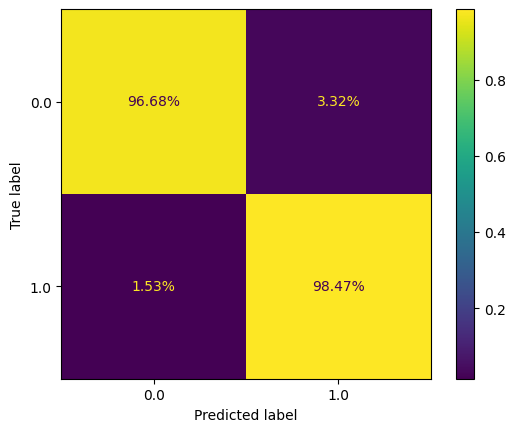

In [6]:
y_pred_valid = (model.predict(X_valid) >= 0.5)
y_pred_valid = y_pred_valid[:, 1]
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 2s 700us/step


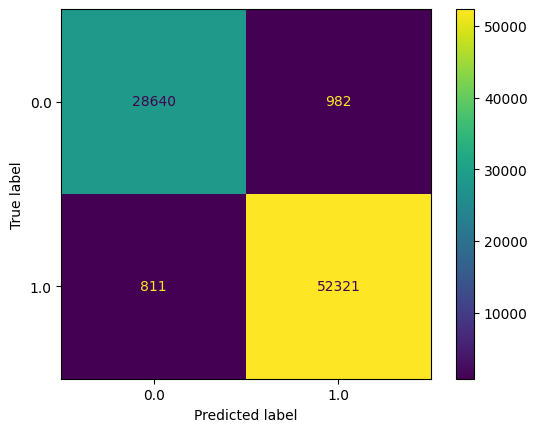

In [8]:
y_pred_valid = (model.predict(X_valid) >= 0.5)
y_pred_valid = y_pred_valid[:, 1]
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid)

In [9]:
(y_pred_valid == y_valid).mean()

np.float64(0.97833337361336)

In [11]:
tf.random.set_seed(4232)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9446 - loss: 0.1350 - val_accuracy: 0.9737 - val_loss: 0.0610
Epoch 2/50
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9738 - loss: 0.0617 - val_accuracy: 0.9744 - val_loss: 0.0589
Epoch 3/50
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9747 - loss: 0.0594 - val_accuracy: 0.9751 - val_loss: 0.0573
Epoch 4/50
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9752 - loss: 0.0576 - val_accuracy: 0.9755 - val_loss: 0.0560
Epoch 5/50
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9757 - loss: 0.0561 - val_accuracy: 0.9759 - val_loss: 0.0547
Epoch 6/50
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9762 - loss: 0.0546 - val_accuracy: 0.9760 - val_loss: 0.0536
Epoch 7/50
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9768 - loss: 0.0533 - val_accuracy: 0.9763 - val_loss: 0.0525
Epoch 8/50
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9772 - loss: 0

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step


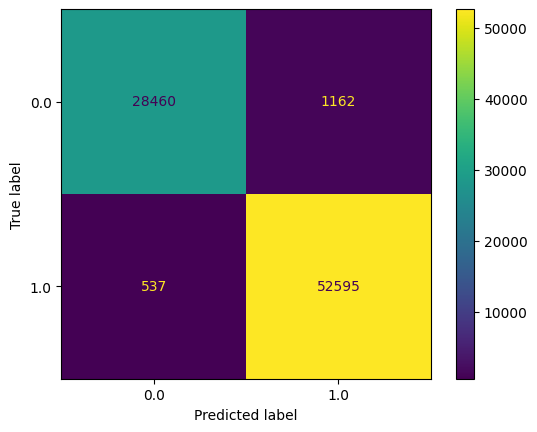

In [14]:
y_pred_valid = (model.predict(X_valid) >= 0.5)
y_pred_valid = y_pred_valid[:, 1]
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid)

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step


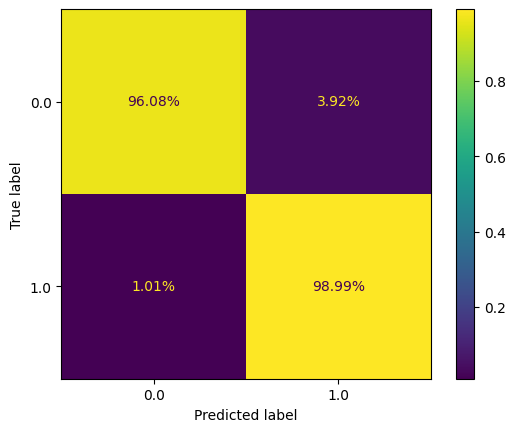

In [16]:
y_pred_valid = (model.predict(X_valid) >= 0.5)
y_pred_valid = y_pred_valid[:, 1]
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [17]:
bigger = model

In [18]:
with open("first_dnn.pkl", "rb") as file:
    model = pkl.load(file)
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=19)

Epoch 1/19
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9802 - loss: 0.0438 - val_accuracy: 0.9800 - val_loss: 0.0446
Epoch 2/19
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9803 - loss: 0.0436 - val_accuracy: 0.9801 - val_loss: 0.0444
Epoch 3/19
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9802 - loss: 0.0434 - val_accuracy: 0.9802 - val_loss: 0.0443
Epoch 4/19
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9804 - loss: 0.0432 - val_accuracy: 0.9802 - val_loss: 0.0442
Epoch 5/19
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9804 - loss: 0.0431 - val_accuracy: 0.9801 - val_loss: 0.0441
Epoch 6/19
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9804 - loss: 0.0429 - val_accuracy: 0.9802 - val_loss: 0.0439
Epoch 7/19
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9804 - loss: 0.0428 - val_accuracy: 0.9802 - val_loss: 0.0438
Epoch 8/19
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9804 - loss: 0

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 2s 693us/step


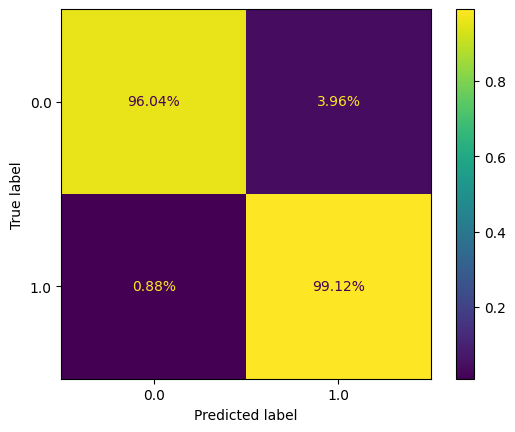

In [19]:
y_pred_valid = (model.predict(X_valid) >= 0.5)
y_pred_valid = y_pred_valid[:, 1]
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")